<a href="https://colab.research.google.com/github/MKrezheska/data-mining-project/blob/main/4_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc, roc_auc_score


#Вчитување на податоците

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/16v9v2020.csv")
df = pd.read_csv("/content/drive/My Drive/with_genres.csv")
df.shape

(1991, 23)

In [ ]:
df = df.drop(["Unnamed: 0.1","Unnamed: 0"], axis="columns")
df.head(100)

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,type,popularity,uri,title,artist,year,target,genre
0,0.425,0.1000,135.128,0.3750,0.328000,0.130000,4,0.701,7,194088,-10.965,0.5620,1,audio_features,89,spotify:track:2Fxmhks0bxGSBdJ92vM42m,bad guy,Billie Eilish,2019,1,22
1,0.125,0.2650,111.554,0.2390,0.751000,0.002070,4,0.521,9,243725,-17.832,0.0528,1,audio_features,78,spotify:track:4QIo4oxwzzafcBWkKjDpXY,xanny,Billie Eilish,2019,1,22
2,0.533,0.1390,150.455,0.1860,0.462000,0.219000,4,0.678,4,180953,-10.485,0.3230,1,audio_features,81,spotify:track:3XF5xLJHOQQRbWya6hBp7d,you should see me in a crown,Billie Eilish,2019,1,22
3,0.444,0.1770,185.044,0.3720,0.283000,0.143000,4,0.726,8,168840,-8.922,0.5690,0,audio_features,80,spotify:track:6IRdLKIyS4p7XNiP8r6rsx,all the good girls go to hell,Billie Eilish,2019,1,22
4,0.351,0.7520,118.028,0.2410,0.390000,0.000009,4,0.853,7,221543,-10.198,0.2820,1,audio_features,81,spotify:track:3Fj47GNK2kUF0uaEDgXLaD,wish you were gay,Billie Eilish,2019,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.836,0.0550,132.937,0.0438,0.000143,0.000507,4,0.484,1,494773,-4.658,0.4030,1,audio_features,41,spotify:track:5jE2hljNVTJZeodUXQu9Ea,Fixxxer,Metallica,1997,1,26
96,0.903,0.0979,157.825,0.0314,0.000022,0.052200,4,0.426,10,304400,-4.535,0.4420,0,audio_features,48,spotify:track:3QWzxUE2WA5WoSi82KCODk,Ain't My Bitch,Metallica,1996,1,26
97,0.907,0.5490,115.217,0.0345,0.000005,0.008570,4,0.512,1,328200,-4.432,0.6730,0,audio_features,45,spotify:track:0SwHR5lvAfgI8Z2D6YgvMd,2 X 4,Metallica,1996,1,26
98,0.859,0.1550,94.437,0.0307,0.000018,0.003410,4,0.478,4,398867,-5.347,0.2860,1,audio_features,45,spotify:track:2UmXstEJ8nkpUUfQRYieC6,The House That Jack Built,Metallica,1996,1,26


In [ ]:
df.drop(['title','artist', 'uri', 'type'], axis=1, inplace=True)
df.head(1991)

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,popularity,year,target,genre
0,0.425,0.100,135.128,0.3750,0.32800,0.130000,4,0.701,7,194088,-10.965,0.5620,1,89,2019,1,22
1,0.125,0.265,111.554,0.2390,0.75100,0.002070,4,0.521,9,243725,-17.832,0.0528,1,78,2019,1,22
2,0.533,0.139,150.455,0.1860,0.46200,0.219000,4,0.678,4,180953,-10.485,0.3230,1,81,2019,1,22
3,0.444,0.177,185.044,0.3720,0.28300,0.143000,4,0.726,8,168840,-8.922,0.5690,0,80,2019,1,22
4,0.351,0.752,118.028,0.2410,0.39000,0.000009,4,0.853,7,221543,-10.198,0.2820,1,81,2019,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,0.364,0.101,123.022,0.0287,0.54500,0.000069,4,0.340,9,203760,-8.331,0.1100,1,41,2019,0,16
1987,0.886,0.096,126.044,0.0443,0.00114,0.000014,4,0.490,8,213333,-5.404,0.4930,1,45,2019,0,16
1988,0.475,0.104,101.069,0.0265,0.34800,0.000025,4,0.475,2,275133,-7.319,0.1290,1,40,2019,0,16
1989,0.637,0.100,76.037,0.0313,0.24900,0.000006,4,0.568,7,192107,-5.977,0.4520,1,39,2019,0,16


In [ ]:
cols = ['genre']  + [col for col in df if col != 'genre']
df = df[cols]

In [ ]:
df.head(100)

,genre,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,popularity,year,target
0,22,0.425,0.1000,135.128,0.3750,0.328000,0.130000,4,0.701,7,194088,-10.965,0.5620,1,89,2019,1
1,22,0.125,0.2650,111.554,0.2390,0.751000,0.002070,4,0.521,9,243725,-17.832,0.0528,1,78,2019,1
2,22,0.533,0.1390,150.455,0.1860,0.462000,0.219000,4,0.678,4,180953,-10.485,0.3230,1,81,2019,1
3,22,0.444,0.1770,185.044,0.3720,0.283000,0.143000,4,0.726,8,168840,-8.922,0.5690,0,80,2019,1
4,22,0.351,0.7520,118.028,0.2410,0.390000,0.000009,4,0.853,7,221543,-10.198,0.2820,1,81,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,26,0.836,0.0550,132.937,0.0438,0.000143,0.000507,4,0.484,1,494773,-4.658,0.4030,1,41,1997,1
96,26,0.903,0.0979,157.825,0.0314,0.000022,0.052200,4,0.426,10,304400,-4.535,0.4420,0,48,1996,1
97,26,0.907,0.5490,115.217,0.0345,0.000005,0.008570,4,0.512,1,328200,-4.432,0.6730,0,45,1996,1
98,26,0.859,0.1550,94.437,0.0307,0.000018,0.003410,4,0.478,4,398867,-5.347,0.2860,1,45,1996,1


In [ ]:
from sklearn.utils import shuffle
df = shuffle(df)
df.head(1991)

,genre,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,popularity,year,target
757,18,0.781,0.0907,86.946,0.0433,0.4030,0.000000,4,0.509,2,208413,-4.882,0.7850,1,7,2009,1
1550,19,0.656,0.2750,117.995,0.0397,0.0110,0.000401,4,0.721,2,228600,-5.501,0.3280,1,41,2012,0
1786,19,0.530,0.1210,111.939,0.0314,0.6090,0.000000,4,0.739,3,200333,-7.355,0.4700,1,50,2013,0
270,5,0.250,0.0988,102.031,0.0314,0.9750,0.018700,1,0.296,7,290636,-10.088,0.0898,1,55,2015,1
492,18,0.915,0.0611,152.443,0.0827,0.0184,0.002080,4,0.590,0,270160,-6.659,0.6720,1,8,1985,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361,16,0.960,0.3370,153.948,0.0953,0.0141,0.000000,4,0.454,11,171867,-2.777,0.5150,0,50,2013,0
1967,17,0.267,0.1110,98.808,0.0259,0.7580,0.000185,3,0.570,2,211213,-10.700,0.2820,1,14,2019,0
1750,27,0.693,0.1140,81.984,0.2770,0.1620,0.000000,4,0.862,10,223389,-4.096,0.4400,0,52,2019,0
1045,14,0.546,0.1020,147.986,0.0575,0.3000,0.000000,4,0.806,9,212867,-6.637,0.8740,1,84,2020,0


#Делење на податочното множество на тренирачко, валидациско и тестирачко 

Делење на податочното множество на тренирачко, валидациско и тестирачко множество, 
    така што првите 70% од секоја од класите  се доделени во тренирачкото множество. 
    Следните 10% од секоја од класите влегуваат во валидациско множество, 
    а последните 20% од секоја од класите се дел од тестирачкото множество.
    На крај се прави shuffle на множествата (заедно со соодветните лабели).

In [ ]:
tmp = df.values.tolist()
dataset =  [[row[i] if i != len(row)-1   else int(row[i]) for i in range(len(row))] for row in tmp]
print(tmp)
print(dataset)

bad_classes = [x for x in dataset if x[-1] == 0]
good_classes = [x for x in dataset if x[-1] == 1]

train_set =  bad_classes[:int(len(bad_classes) * 0.7)] + good_classes[:int(len(good_classes) * 0.7)]
val_set = bad_classes[int(len(bad_classes) * 0.7):int(len(bad_classes) * 0.8)] + good_classes[int(len(good_classes) * 0.7):int(len(good_classes) * 0.8)]
test_set =  bad_classes[int(len(bad_classes) * 0.8):] + good_classes[int(len(good_classes) * 0.8):]

train_x = [x[:-1] for x in train_set]
train_y = [x[-1] for x in train_set]
val_x = [x[:-1] for x in val_set]
val_y = [x[-1] for x in val_set]
test_x = [x[:-1] for x in test_set]
test_y = [x[-1] for x in test_set]


In [ ]:
import collections
X_train = np.array(train_x)
y_train = np.array(train_y)
X_val = np.array(val_x)
y_val = np.array(val_y)
X_test = np.array(test_x)
y_test = np.array(test_y)

from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train,y_train,random_state=0)
X_val, y_val = shuffle(X_val, y_val,random_state=0)
X_test, y_test = shuffle(X_test, y_test,random_state=0)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)
print(collections.Counter(y_train))
print(collections.Counter(y_val))
print(collections.Counter(y_test))

(1392, 16) (200, 16) (399, 16)
(1392,) (200,) (399,)
Counter({1: 702, 0: 690})
Counter({1: 101, 0: 99})
Counter({1: 201, 0: 198})


#Наивен Баесов, Дрво на одлука и Рандом Форест

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

dtc = DecisionTreeClassifier()
nbc = GaussianNB()
rfc = RandomForestClassifier()

dtc.fit(X_train, y_train)
nbc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
importances = list(rfc.feature_importances_)
indices = np.argsort(importances)[::-1]

most_important_feature = importances.index(max(importances))
least_important_feature = importances.index(min(importances))
print('Most important feature: '+ df.columns[most_important_feature])
print('Least important feature: '+ df.columns[least_important_feature])

Most important feature: genre
Least important feature: time_signature


In [ ]:
from sklearn.metrics import classification_report

tree_predict = dtc.predict(X_val)
naive_predict = nbc.predict(X_val)
random_forest_predict = rfc.predict(X_val)

print('Decision Tree score on validation:\n', classification_report( y_val,tree_predict))
print('Naive Bayes score on validation:\n', classification_report( y_val,naive_predict))
print('Random Forest score on validation:\n', classification_report( y_val,random_forest_predict))

Decision Tree score on validation:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        99
           1       0.93      0.97      0.95       101

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

Naive Bayes score on validation:
               precision    recall  f1-score   support

           0       0.68      0.92      0.78        99
           1       0.88      0.57      0.69       101

    accuracy                           0.74       200
   macro avg       0.78      0.75      0.74       200
weighted avg       0.78      0.74      0.74       200

Random Forest score on validation:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93        99
           1       0.94      0.92      0.93       101

    accuracy                           0.93       200
   macro avg       0.9

In [ ]:
from sklearn.metrics import classification_report

test_tree_predict = dtc.predict(X_test)
test_naive_predict = nbc.predict(X_test)
test_random_forest_predict = rfc.predict(X_test)

print('Decision Tree score on test:\n', classification_report( y_test,test_tree_predict))
print('Naive Bayes score on test:\n', classification_report( y_test,test_naive_predict))
print('Random Forest score on test:\n', classification_report( y_test,test_random_forest_predict))

Decision Tree score on test:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       198
           1       0.95      0.93      0.94       201

    accuracy                           0.94       399
   macro avg       0.94      0.94      0.94       399
weighted avg       0.94      0.94      0.94       399

Naive Bayes score on test:
               precision    recall  f1-score   support

           0       0.67      0.91      0.77       198
           1       0.87      0.55      0.67       201

    accuracy                           0.73       399
   macro avg       0.77      0.73      0.72       399
weighted avg       0.77      0.73      0.72       399

Random Forest score on test:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       198
           1       0.95      0.90      0.92       201

    accuracy                           0.92       399
   macro avg       0.93      0.93      0

,Model,Acc,Recall,ROC,TP,FN
0,Decision Tree,0.93985,0.930348,0.939922,187,14


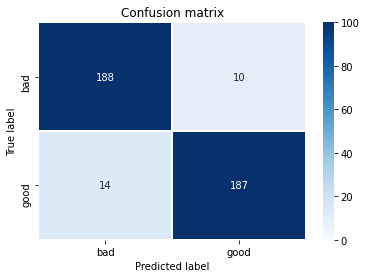

In [ ]:
confusion = confusion_matrix(y_test, test_tree_predict)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

df_Results = pd.DataFrame(columns = ["Model", "Acc","Recall","ROC","TP","FN"])
df_Results.loc[0, "Model"] = "Decision Tree "
df_Results.loc[0, "Acc"] = accuracy_score(y_test, test_tree_predict)
df_Results.loc[0, "Recall"] = recall_score(y_test, test_tree_predict)
df_Results.loc[0, "ROC"] = roc_auc_score(y_test,test_tree_predict)
df_Results.loc[0, "TP"] = TP
df_Results.loc[0, "FN"] = FN


import seaborn as sn
from sklearn.metrics import confusion_matrix
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd

# Визуелизација со матрица на конфузија (Random Forest)
names = ['bad', 'good'] #?

#ako sakate so procent odkomentirajte go ova i postavi fmt=".1f"
# cm = 100 * cm.astype('float') / cm.sum(axis=-1)[:, np.newaxis]  

df = pd.DataFrame(data=confusion, columns=names, index=names)
g = sn.heatmap(df, annot=True, fmt=".0f", linewidths=.5, vmin=0, vmax=100,
                    cmap='Blues')
g.set_title('Confusion matrix')
g.set_ylabel('True label')
g.set_xlabel('Predicted label')
g.plot()

df_Results.head()


,Model,Acc,Recall,ROC,TP,FN
0,Decision Tree,0.93985,0.930348,0.939922,187,14
1,Random Forest,0.924812,0.895522,0.925034,180,21


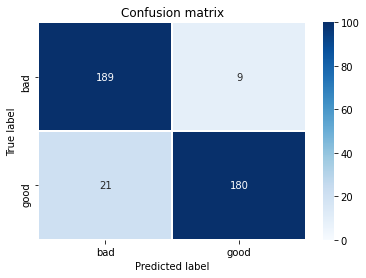

In [ ]:
confusion = confusion_matrix(y_test, test_random_forest_predict)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

df_Results.loc[1, "Model"] = "Random Forest"
df_Results.loc[1, "Acc"] = accuracy_score(y_test, test_random_forest_predict)
df_Results.loc[1, "Recall"] = recall_score(y_test, test_random_forest_predict)
df_Results.loc[1, "ROC"] = roc_auc_score(y_test,test_random_forest_predict)
df_Results.loc[1, "TP"] = TP
df_Results.loc[1, "FN"] = FN

import seaborn as sn
from sklearn.metrics import confusion_matrix
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd

# Визуелизација со матрица на конфузија (Random Forest)
names = ['bad', 'good'] #?

#ako sakate so procent odkomentirajte go ova i postavi fmt=".1f"
# cm = 100 * cm.astype('float') / cm.sum(axis=-1)[:, np.newaxis]  

df = pd.DataFrame(data=confusion, columns=names, index=names)
g = sn.heatmap(df, annot=True, fmt=".0f", linewidths=.5, vmin=0, vmax=100,
                    cmap='Blues')
g.set_title('Confusion matrix')
g.set_ylabel('True label')
g.set_xlabel('Predicted label')
g.plot()

df_Results.head()

,Model,Acc,Recall,ROC,TP,FN
0,Decision Tree,0.93985,0.930348,0.939922,187,14
1,Random Forest,0.924812,0.895522,0.925034,180,21
2,Naive Bayes,0.729323,0.547264,0.730703,110,91
3,XGBoost,0.9599,0.970149,0.959822,195,6
4,KNN,0.566416,0.562189,0.566448,113,88


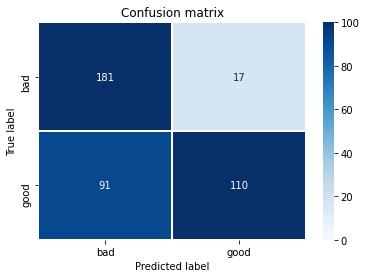

In [ ]:
confusion = confusion_matrix(y_test, test_naive_predict)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

df_Results.loc[2, "Model"] = "Naive Bayes"
df_Results.loc[2, "Acc"] = accuracy_score(y_test, test_naive_predict)
df_Results.loc[2, "Recall"] = recall_score(y_test, test_naive_predict)
df_Results.loc[2, "ROC"] = roc_auc_score(y_test,test_naive_predict)
df_Results.loc[2, "TP"] = TP
df_Results.loc[2, "FN"] = FN

import seaborn as sn
from sklearn.metrics import confusion_matrix
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd

# Визуелизација со матрица на конфузија (Random Forest)
names = ['bad', 'good'] #?

#ako sakate so procent odkomentirajte go ova i postavi fmt=".1f"
# cm = 100 * cm.astype('float') / cm.sum(axis=-1)[:, np.newaxis]  

df = pd.DataFrame(data=confusion, columns=names, index=names)
g = sn.heatmap(df, annot=True, fmt=".0f", linewidths=.5, vmin=0, vmax=100,
                    cmap='Blues')
g.set_title('Confusion matrix')
g.set_ylabel('True label')
g.set_xlabel('Predicted label')
g.plot()

df_Results.head()

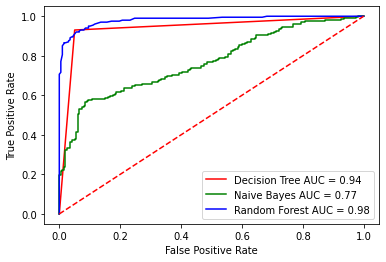

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual = y_test
decision_tree_prob = [p[1] for p in dtc.predict_proba(X_test)]
naive_bayes_prob = [p[1] for p in nbc.predict_proba(X_test)]
random_forest_prob = [p[1] for p in rfc.predict_proba(X_test)]

dt_false_pos, dt_true_pos, _ = roc_curve(actual, decision_tree_prob)
dt_auc = auc(dt_false_pos, dt_true_pos)

nb_false_pos, nb_true_pos, _ = roc_curve(actual, naive_bayes_prob)
nb_auc = auc(nb_false_pos, nb_true_pos)

rf_false_pos, rf_true_pos, _ = roc_curve(actual, random_forest_prob)
rf_auc = auc(rf_false_pos, rf_true_pos)

# plot
plt.plot(dt_false_pos, dt_true_pos, 'r', label='Decision Tree AUC = %0.2f'% dt_auc)
plt.plot(nb_false_pos, nb_true_pos, 'g', label='Naive Bayes AUC = %0.2f'% nb_auc)
plt.plot(rf_false_pos, rf_true_pos, 'b', label='Random Forest AUC = %0.2f'% rf_auc)

plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#XGBOOST

In [ ]:
#80% train, 20% test
xtrain = np.concatenate((X_train,X_val)) 
ytrain = np.concatenate((y_train,y_val))  

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    7.6s finished


Best score: 0.948
Best parameters set:
	 colsample_bytree: 0.9455623128602142
	 gamma: 3.575967613442871
	 learning_rate: 0.27576831778910404
	 max_depth: 11
	 min_child_weight: 2.627153899197542
	 n_estimators: 33
	 reg_alpha: 3.0479230451650974
	 subsample: 0.8814371451913551
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       198
           1       0.95      0.97      0.96       201

    accuracy                           0.96       399
   macro avg       0.96      0.96      0.96       399
weighted avg       0.96      0.96      0.96       399

accuracy:  0.9598997493734336




[]

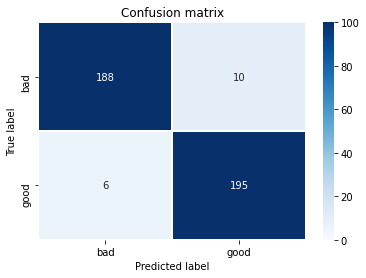

In [ ]:
from xgboost.sklearn import XGBClassifier
import scipy.stats as st
from sklearn.model_selection import RandomizedSearchCV

model_xg = XGBClassifier(random_state=42,n_jobs=-1)

one_to_left = st.beta(10, 1) # Esta distribución nos dará valores entre 0 y 1 mayormente cercanos a 1

parameters6 = {  
    "n_estimators": st.randint(20,40), # Number of boosted trees to fit.
    'reg_alpha': st.uniform(0.05,10),   # L1 regularization term on weights
    "max_depth": st.randint(3, 12),     # Maximum tree depth for base learners.
    "learning_rate": st.uniform(0.05, 0.4), #     Boosting learning rate (xgb’s “eta”)

    "colsample_bytree": one_to_left, #     Subsample ratio of columns when constructing each tree.
    "subsample": one_to_left,     # Subsample ratio of the training instance.
    "gamma": st.uniform(0, 10), #     Minimum loss reduction required to make a further partition on a leaf node of the tree.
    "min_child_weight": st.uniform(1,20), #    Minimum sum of instance weight(hessian) needed in a child.
}

xgb = RandomizedSearchCV(model_xg,parameters6, scoring='recall', n_iter=25, verbose= True)

xgb.fit(xtrain, ytrain)

print("Best score: %0.3f" % xgb.best_score_) 
print("Best parameters set:" )
best_parameters6 = xgb.best_estimator_.get_params()
for param_name6 in sorted (parameters6 . keys()): 
                    print("\t %s: %r" % (param_name6, best_parameters6[param_name6]))
        
y_pred = xgb.predict(X_test)

print(classification_report(y_test, y_pred))
print("accuracy: ",accuracy_score(y_test, y_pred))
print ("\n")
# Визуелизација со матрица на конфузија (Random Forest)
cm=confusion_matrix(y_test,y_pred)
names = ['bad', 'good'] #?

#ako sakate so procent odkomentirajte go ova i postavi fmt=".1f"
# cm = 100 * cm.astype('float') / cm.sum(axis=-1)[:, np.newaxis]  

df = pd.DataFrame(data=cm, columns=names, index=names)
g = sn.heatmap(df, annot=True, fmt=".0f", linewidths=.5, vmin=0, vmax=100,
                    cmap='Blues')
g.set_title('Confusion matrix')
g.set_ylabel('True label')
g.set_xlabel('Predicted label')
g.plot()

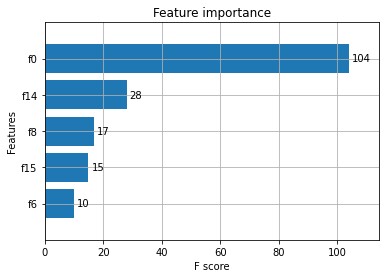

In [ ]:
from xgboost import plot_importance

#f0 e genre, f14 e popularity
plot_importance(xgb.best_estimator_, height = 0.8,max_num_features=5);

,Model,Acc,Recall,ROC,TP,FN
0,Decision Tree,0.93985,0.930348,0.939922,187,14
1,Random Forest,0.924812,0.895522,0.925034,180,21
2,Naive Bayes,0.729323,0.547264,0.730703,110,91
3,XGBoost,0.9599,0.970149,0.959822,195,6


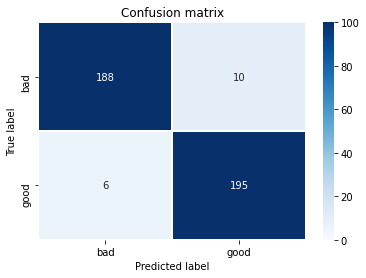

In [ ]:
confusion = confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

df_Results.loc[3, "Model"] = "XGBoost"
df_Results.loc[3, "Acc"] = accuracy_score(y_test, y_pred)
df_Results.loc[3, "Recall"] = recall_score(y_test, y_pred)
df_Results.loc[3, "ROC"] = roc_auc_score(y_test,y_pred)
df_Results.loc[3, "TP"] = TP
df_Results.loc[3, "FN"] = FN

import seaborn as sn
from sklearn.metrics import confusion_matrix
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd

# Визуелизација со матрица на конфузија (Random Forest)
names = ['bad', 'good'] #?

#ako sakate so procent odkomentirajte go ova i postavi fmt=".1f"
# cm = 100 * cm.astype('float') / cm.sum(axis=-1)[:, np.newaxis]  

df = pd.DataFrame(data=confusion, columns=names, index=names)
g = sn.heatmap(df, annot=True, fmt=".0f", linewidths=.5, vmin=0, vmax=100,
                    cmap='Blues')
g.set_title('Confusion matrix')
g.set_ylabel('True label')
g.set_xlabel('Predicted label')
g.plot()

df_Results.head()

#K-Nearest Neighbor Machine Learning Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

knn_model = KNeighborsClassifier() 
knn_model.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

              precision    recall  f1-score   support

           0       0.56      0.57      0.57       198
           1       0.57      0.56      0.57       201

    accuracy                           0.57       399
   macro avg       0.57      0.57      0.57       399
weighted avg       0.57      0.57      0.57       399

[[113  85]
 [ 88 113]]


[]

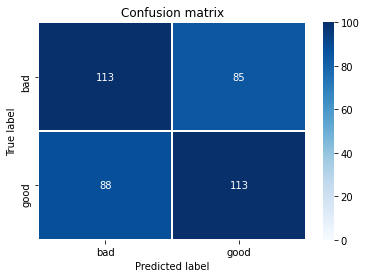

In [ ]:
pred = knn_model.predict(X_test)
print(classification_report(y_test, pred))
# Визуелизација со матрица на конфузија (Random Forest)
cm=confusion_matrix(y_test,pred)
print(cm)
names = ['bad', 'good'] #?

#ako sakate so procent odkomentirajte go ova i postavi fmt=".1f"
# cm = 100 * cm.astype('float') / cm.sum(axis=-1)[:, np.newaxis]  

df = pd.DataFrame(data=cm, columns=names, index=names)
g = sn.heatmap(df, annot=True, fmt=".0f", linewidths=.5, vmin=0, vmax=100,
                    cmap='Blues')
g.set_title('Confusion matrix')
g.set_ylabel('True label')
g.set_xlabel('Predicted label')
g.plot()


In [ ]:
confusion = confusion_matrix(y_test, pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

df_Results.loc[4, "Model"] = "KNN"
df_Results.loc[4, "Acc"] = accuracy_score(y_test, pred)
df_Results.loc[4, "Recall"] = recall_score(y_test, pred)
df_Results.loc[4, "ROC"] = roc_auc_score(y_test,pred)
df_Results.loc[4, "TP"] = TP
df_Results.loc[4, "FN"] = FN

df_Results.head()

,Model,Acc,Recall,ROC,TP,FN
0,Decision Tree,0.93985,0.930348,0.939922,187,14
1,Random Forest,0.924812,0.895522,0.925034,180,21
2,Naive Bayes,0.729323,0.547264,0.730703,110,91
3,XGBoost,0.9599,0.970149,0.959822,195,6
4,KNN,0.566416,0.562189,0.566448,113,88


#Пример невронскa мрежa

In [ ]:
import keras
from keras.models import Sequential #to initialize ANN
from keras.layers import Dense      # to create layers in ANN model
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(16,)))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.5))
model.add(Dense(125,activation='tanh'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
model.fit(X_train, y_train, epochs=32, batch_size=512,validation_data=(X_val,y_val),callbacks = [es])
# model.fit(xtrain, ytrain, epochs=100, batch_size=100,validation_data=(X_val,y_val),callbacks = [es])

Epoch 1/32
3/3 [==============================] - 0s 65ms/step - loss: 0.8935 - accuracy: 0.5158 - val_loss: 0.7210 - val_accuracy: 0.5100
Epoch 2/32
3/3 [==============================] - 0s 11ms/step - loss: 0.8455 - accuracy: 0.5194 - val_loss: 0.6989 - val_accuracy: 0.5400
Epoch 3/32
3/3 [==============================] - 0s 10ms/step - loss: 0.8221 - accuracy: 0.4871 - val_loss: 0.6976 - val_accuracy: 0.5300
Epoch 4/32
3/3 [==============================] - 0s 10ms/step - loss: 0.8069 - accuracy: 0.4928 - val_loss: 0.7017 - val_accuracy: 0.5450
Epoch 5/32
3/3 [==============================] - 0s 9ms/step - loss: 0.8083 - accuracy: 0.5115 - val_loss: 0.7061 - val_accuracy: 0.5350
Epoch 6/32
3/3 [==============================] - 0s 9ms/step - loss: 0.8061 - accuracy: 0.5115 - val_loss: 0.7039 - val_accuracy: 0.5250
Epoch 7/32
3/3 [==============================] - 0s 10ms/step - loss: 0.7858 - accuracy: 0.5244 - val_loss: 0.6965 - val_accuracy: 0.5300
Epoch 8/32
3/3 [=============

In [ ]:
probs       = model.predict(X_test)
preds       = probs.argmax(axis = 1)
print('Neural network score on test:\n',classification_report(y_test, preds))

Neural network score on test:
               precision    recall  f1-score   support

           0       0.59      0.83      0.69       198
           1       0.72      0.42      0.53       201

    accuracy                           0.62       399
   macro avg       0.65      0.63      0.61       399
weighted avg       0.65      0.62      0.61       399



In [ ]:
confusion = confusion_matrix(y_test, preds)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

df_Results.loc[5, "Model"] = "NN #1"
df_Results.loc[5, "Acc"] = accuracy_score(y_test, preds)
df_Results.loc[5, "Recall"] = recall_score(y_test, preds)
df_Results.loc[5, "ROC"] = roc_auc_score(y_test,preds)
df_Results.loc[5, "TP"] = TP
df_Results.loc[5, "FN"] = FN

df_Results.head(10)

,Model,Acc,Recall,ROC,TP,FN
0,Decision Tree,0.93985,0.930348,0.939922,187,14
1,Random Forest,0.924812,0.895522,0.925034,180,21
2,Naive Bayes,0.729323,0.547264,0.730703,110,91
3,XGBoost,0.9599,0.970149,0.959822,195,6
4,KNN,0.566416,0.562189,0.566448,113,88
5,NN #1,0.62406,0.41791,0.625622,84,117


#KNN со подесени параметри

Tuned KNN Parameters: {'n_neighbors': 17, 'weights': 'uniform'}
Best score is 0.6521535076479192
              precision    recall  f1-score   support

           0       0.60      0.69      0.64       198
           1       0.64      0.54      0.58       201

    accuracy                           0.61       399
   macro avg       0.62      0.61      0.61       399
weighted avg       0.62      0.61      0.61       399



[]

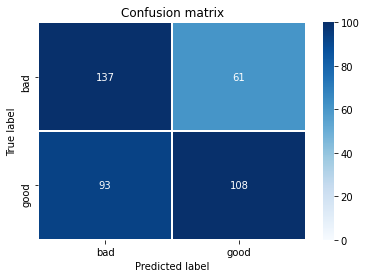

In [ ]:
from sklearn.model_selection import GridSearchCV

param_KNN = {"n_neighbors": np.arange(1, 20),
              "weights": ['uniform','distance']}

# Instantiate the GridSearchCV object: logreg_cv
KNN_cv = GridSearchCV(knn_model, param_KNN, cv=5, scoring='roc_auc')

# Fit it to the data
KNN_cv.fit(xtrain, ytrain)

# Print the tuned parameters and score
print("Tuned KNN Parameters: {}".format(KNN_cv.best_params_)) 
print("Best score is {}".format(KNN_cv.best_score_))
print(classification_report(y_test, KNN_cv.predict(X_test) ))

cm=confusion_matrix(y_test,KNN_cv.predict(X_test))
names = ['bad', 'good'] #?

#ako sakate so procent odkomentirajte go ova i postavi fmt=".1f"
# cm = 100 * cm.astype('float') / cm.sum(axis=-1)[:, np.newaxis]  

df = pd.DataFrame(data=cm, columns=names, index=names)
g = sn.heatmap(df, annot=True, fmt=".0f", linewidths=.5, vmin=0, vmax=100,
                    cmap='Blues')
g.set_title('Confusion matrix')
g.set_ylabel('True label')
g.set_xlabel('Predicted label')
g.plot()

In [ ]:
confusion = confusion_matrix(y_test, KNN_cv.predict(X_test))
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

df_Results.loc[6, "Model"] = "Tuned KNN"
df_Results.loc[6, "Acc"] = accuracy_score(y_test, KNN_cv.predict(X_test))
df_Results.loc[6, "Recall"] = recall_score(y_test, KNN_cv.predict(X_test))
df_Results.loc[6, "ROC"] = roc_auc_score(y_test,KNN_cv.predict(X_test))
df_Results.loc[6, "TP"] = TP
df_Results.loc[6, "FN"] = FN

df_Results.head(10)

,Model,Acc,Recall,ROC,TP,FN
0,Decision Tree,0.93985,0.930348,0.939922,187,14
1,Random Forest,0.924812,0.895522,0.925034,180,21
2,Naive Bayes,0.729323,0.547264,0.730703,110,91
3,XGBoost,0.9599,0.970149,0.959822,195,6
4,KNN,0.566416,0.562189,0.566448,113,88
5,NN #1,0.62406,0.41791,0.625622,84,117
6,Tuned KNN,0.614035,0.537313,0.614616,108,93


#Random Forest со подесени параметри

Best score: 0.914
Best parameters set:
	 base_estimator__max_depth: None
	 base_estimator__max_features: None
	 base_estimator__min_samples_leaf: 5
	 base_estimator__min_samples_split: 5
	 bootstrap_features: False
	 max_features: 1.0
	 max_samples: 1.0
	 n_estimators: 5
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       198
           1       0.97      0.93      0.95       201

    accuracy                           0.95       399
   macro avg       0.95      0.95      0.95       399
weighted avg       0.95      0.95      0.95       399

accuracy:  0.9523809523809523


[[193   5]
 [ 14 187]]


[]

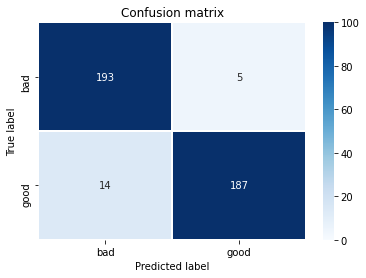

In [ ]:
# Ensambble

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

kf = StratifiedKFold(n_splits=5, shuffle=True)

parameters5 = {"base_estimator__max_depth": [3,5,None],
          "base_estimator__max_features": [None, "auto"],
          "base_estimator__min_samples_leaf": [1, 5],
          "base_estimator__min_samples_split": [2, 5],
          'bootstrap_features': [False, True],
          'max_features': [0.5, 1.0],
          'max_samples': [0.5, 1.0],
          'n_estimators': [2, 5],
         }

model_rf = BaggingClassifier(DecisionTreeClassifier(random_state=42))

gs5 = RandomizedSearchCV(model_rf, parameters5, scoring='recall', n_jobs=3, cv=kf)
gs5.fit(xtrain, ytrain)

print("Best score: %0.3f" % gs5.best_score_) 
print("Best parameters set:" )
best_parameters5 = gs5.best_estimator_.get_params()
for param_name5 in sorted (parameters5 . keys()): 
                    print("\t %s: %r" % (param_name5, best_parameters5[param_name5]))
        
y_pred = gs5.predict(X_test)

print(classification_report(y_test, y_pred))
print("accuracy: ",accuracy_score(y_test, y_pred))
print ("\n")
# Визуелизација со матрица на конфузија (Random Forest)
cm=confusion_matrix(y_test,y_pred)
print(cm)
names = ['bad', 'good'] #?

#ako sakate so procent odkomentirajte go ova i postavi fmt=".1f"
# cm = 100 * cm.astype('float') / cm.sum(axis=-1)[:, np.newaxis]  

df = pd.DataFrame(data=cm, columns=names, index=names)
g = sn.heatmap(df, annot=True, fmt=".0f", linewidths=.5, vmin=0, vmax=100,
                    cmap='Blues')
g.set_title('Confusion matrix')
g.set_ylabel('True label')
g.set_xlabel('Predicted label')
g.plot()


In [ ]:
confusion = confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

df_Results.loc[7, "Model"] = "Tuned Random Forest"
df_Results.loc[7, "Acc"] = accuracy_score(y_test, y_pred)
df_Results.loc[7, "Recall"] = recall_score(y_test, y_pred)
df_Results.loc[7, "ROC"] = roc_auc_score(y_test,y_pred)
df_Results.loc[7, "TP"] = TP
df_Results.loc[7, "FN"] = FN

df_Results.head(10)

,Model,Acc,Recall,ROC,TP,FN
0,Decision Tree,0.93985,0.930348,0.939922,187,14
1,Random Forest,0.924812,0.895522,0.925034,180,21
2,Naive Bayes,0.729323,0.547264,0.730703,110,91
3,XGBoost,0.9599,0.970149,0.959822,195,6
4,KNN,0.566416,0.562189,0.566448,113,88
5,NN #1,0.62406,0.41791,0.625622,84,117
6,Tuned KNN,0.614035,0.537313,0.614616,108,93
7,Tuned Random Forest,0.952381,0.930348,0.952548,187,14


In [ ]:
cd drive/My\ Drive

In [ ]:
df_Results.to_csv("modeli.csv")

In [ ]:
ls

 29v9v2020.csv            modeli.csv                 Untitled1.ipynb
'Colab Notebooks'/        movie_rating_prediction/   Untitled2.ipynb
 CovidMKD/                testSelenium.txt           with_genres.csv
 Data-Science-Projects/   tmdb_data/
 datasets/                Untitled0.ipynb


In [ ]:
modeli = pd.read_csv("/content/drive/My Drive/modeli.csv")
modeli.head(10)

,Unnamed: 0,Model,Acc,Recall,ROC,TP,FN
0,0,Decision Tree,0.939850,0.930348,0.939922,187,14
1,1,Random Forest,0.924812,0.895522,0.925034,180,21
2,2,Naive Bayes,0.729323,0.547264,0.730703,110,91
3,3,XGBoost,0.959900,0.970149,0.959822,195,6
4,4,KNN,0.566416,0.562189,0.566448,113,88
5,5,NN #1,0.624060,0.417910,0.625622,84,117
6,6,Tuned KNN,0.614035,0.537313,0.614616,108,93
7,7,Tuned Random Forest,0.952381,0.930348,0.952548,187,14
